In [1]:
import sys
sys.path.insert(1, '../') 
import mmcv

from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import cv2

In [2]:
config_file = '../configs/activations/iif/iif_r50_4x4_2x_ph.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = '../experiments/baselines/r50_rfs_4x4_1x/latest.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/nobackup/projects/bdliv03/workspace/object_detection/projects/LongTailActivations/demo/../mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  warnings.warn(


Use load_from_local loader


In [4]:
# print(model)

In [19]:
# test a single image
img = 'traffic.jpg'
result = inference_detector(model, img)

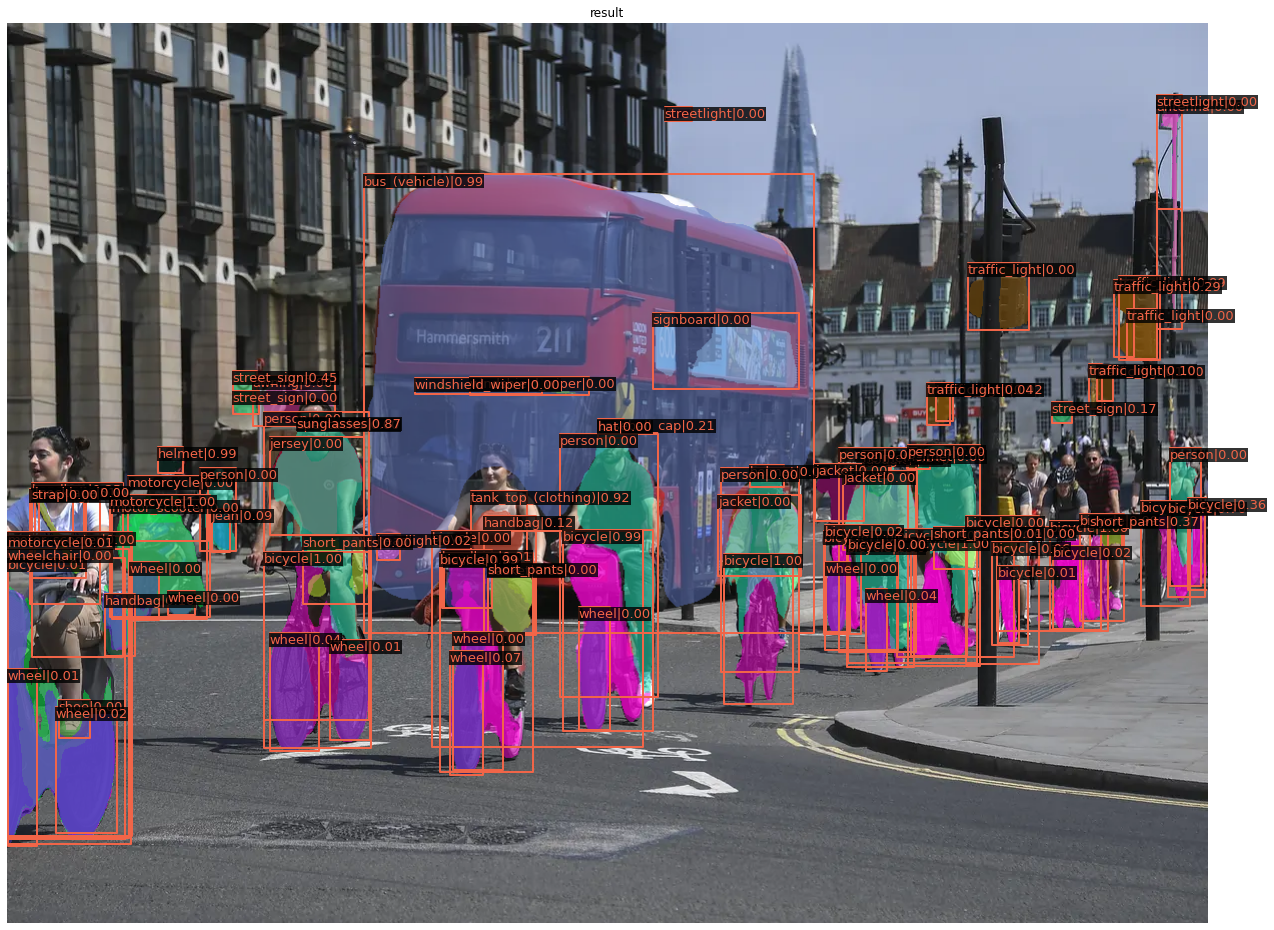

In [27]:
show_result_pyplot(model, img, result,score_thr=0.0)

In [15]:
config_file2 = '../experiments/baselines/r50_rfs_4x4_1x/r50_rfs_4x4_1x.py'

checkpoint_file2 = '../experiments/baselines/r50_rfs_4x4_1x/latest.pth'
model2 = init_detector(config_file2, checkpoint_file2, device='cuda:0')


Use load_from_local loader


In [21]:
img = 'traffic.jpg'
result2 = inference_detector(model2, img)

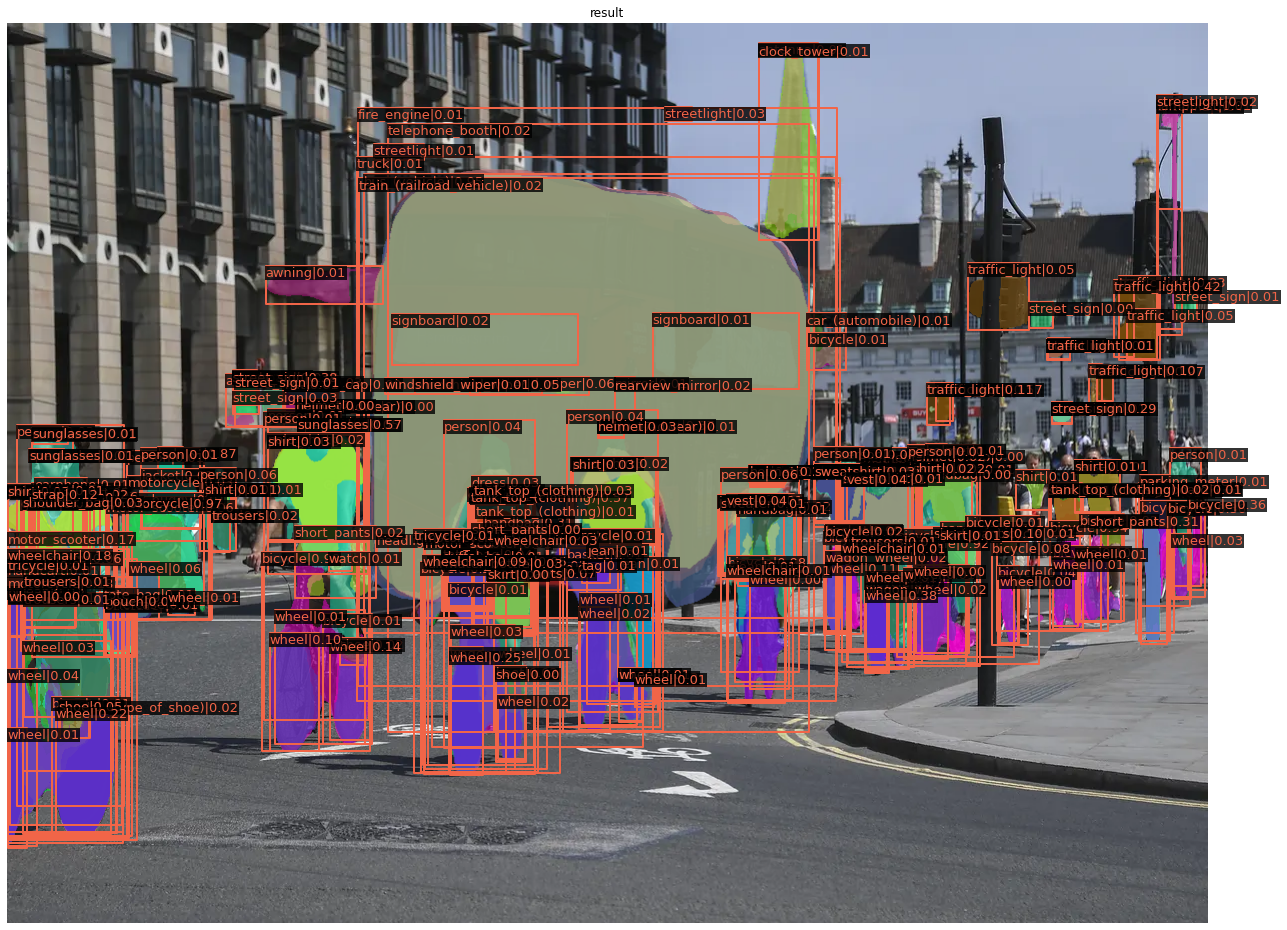

In [26]:
# show the results

show_result_pyplot(model2, img, result2,score_thr=0.001)

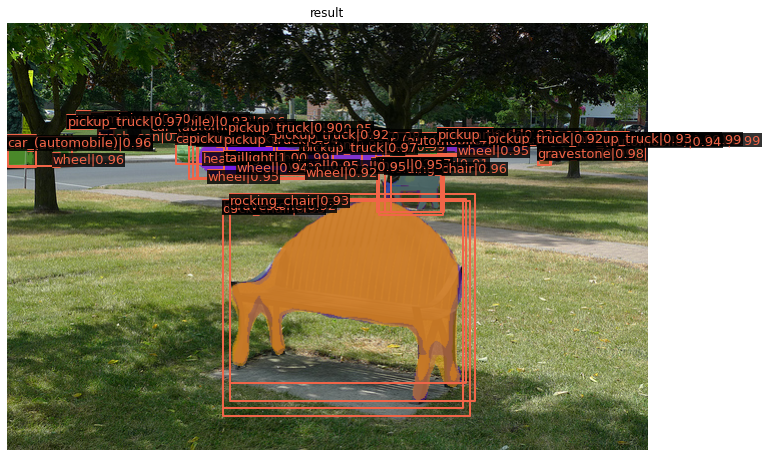

In [8]:
show_result_pyplot(model_2, img, result_2,score_thr=0.9)

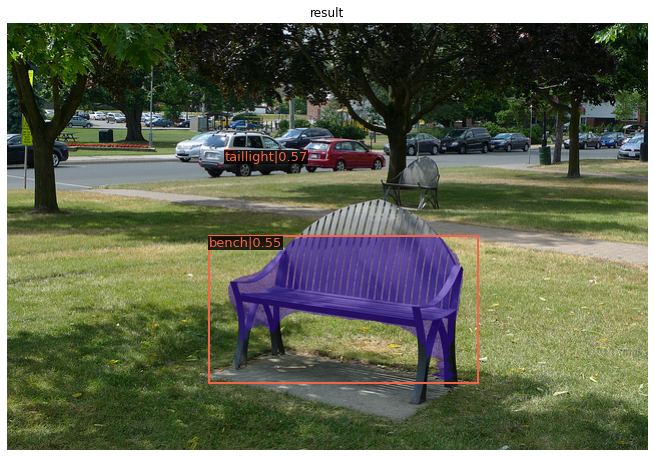

In [25]:
show_result_pyplot(model, img, result)

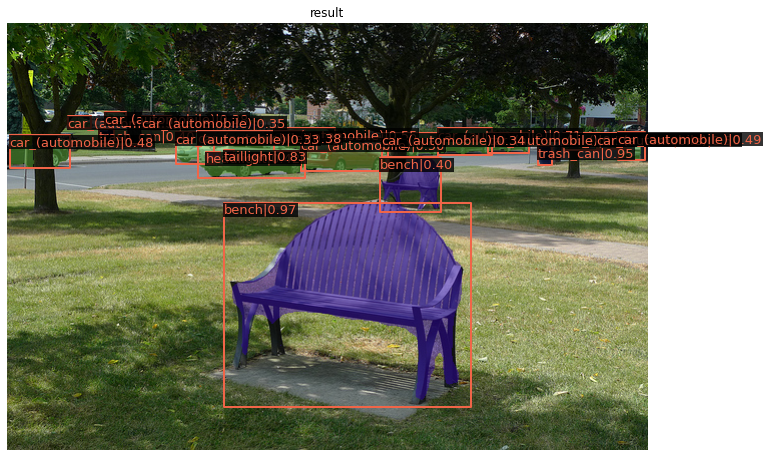

In [29]:
show_result_pyplot(model, img, result)

In [1]:
import os
images = [img for img in os.listdir("./test/detections") if img.endswith(".jpg")]

In [9]:
order = [int(f.split('.')[0][5:]) for f in images]
# print(order)
images[sorted(range(len(order)), key=lambda k: order[k])]

TypeError: list indices must be integers or slices, not list

In [30]:
import torch
x = torch.randn(3, 4)
x



tensor([[-0.4826,  0.4854,  1.0980,  1.2098],
        [-1.7937,  0.1255,  1.2496, -1.3103],
        [ 1.3378, -1.0349,  0.6516, -0.0998]])

In [36]:

indices = torch.tensor([x.shape[1]-1]+(torch.arange(x.shape[1]-1)).tolist())
# torch.index_select(x, 0, indices)
torch.index_select(x, 1, indices)

tensor([[ 1.2098, -0.4826,  0.4854,  1.0980],
        [-1.3103, -1.7937,  0.1255,  1.2496],
        [-0.0998,  1.3378, -1.0349,  0.6516]])

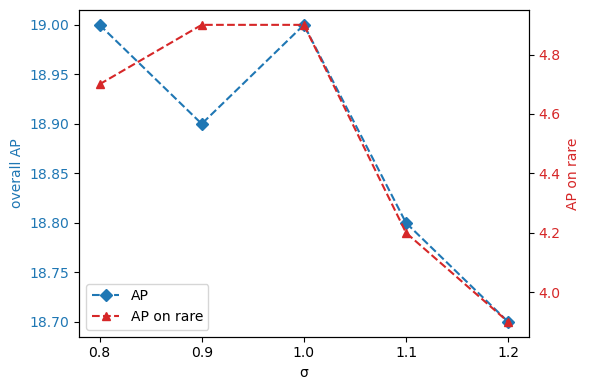

In [20]:
import matplotlib.pyplot as plt
import numpy as np

labels=['0.8','0.9','1.0','1.1','1.2']
gumbel=[19.0,18.9,19,18.8,18.7]
gumbel_r=[4.7,4.9,4.9,4.2,3.9]


fig, ax1 = plt.subplots(dpi=100)

color = 'tab:blue'
ax1.set_ylabel('overall AP', color=color)
ax1.set_xlabel('σ')
ax1.plot(labels, gumbel, color=color,label='AP',linestyle="--",marker='D')
# ax1.plot(labels, gumbel, color=color,label='Gumbel',linestyle="-.",marker='^')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('AP on rare', color=color)  # we already handled the x-label with ax1
# ax2.plot(labels, soft_r, color=color,linestyle="--",label='Softmax',marker='D')
ax2.plot(labels, gumbel_r, color=color,linestyle="--",label='AP on rare',marker='^')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc="lower left", bbox_to_anchor=(0,0), bbox_transform=ax2.transAxes)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('sigma_abl.jpg')

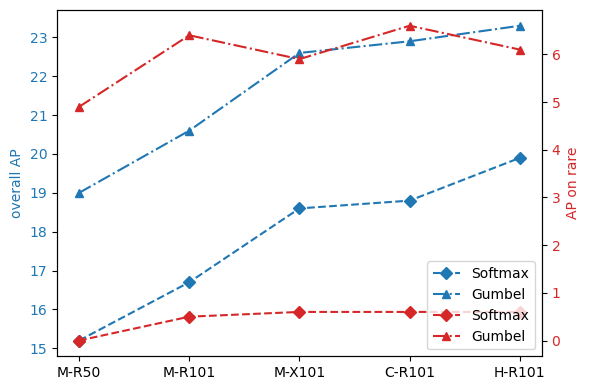

In [1]:
import matplotlib.pyplot as plt
import numpy as np

labels=["M-R50","M-R101","M-X101","C-R101","H-R101"]
soft=[15.2,16.7,18.6,18.8,19.9]
soft_r=[0.0,0.5,0.6,0.6,0.6]
gumbel=[19.0,20.6,22.6,22.9,23.3]
gumbel_r=[4.9,6.4,5.9,6.6,6.1]


fig, ax1 = plt.subplots(dpi=100)

color = 'tab:blue'
ax1.set_ylabel('overall AP', color=color)
ax1.plot(labels, soft, color=color,label='Softmax',linestyle="--",marker='D')
ax1.plot(labels, gumbel, color=color,label='Gumbel',linestyle="-.",marker='^')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('AP on rare', color=color)  # we already handled the x-label with ax1
ax2.plot(labels, soft_r, color=color,linestyle="--",label='Softmax',marker='D')
ax2.plot(labels, gumbel_r, color=color,linestyle="-.",label='Gumbel',marker='^')
ax2.tick_params(axis='y', labelcolor=color)
# fig.legend(loc="lower middle")
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax2.transAxes)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('ap_maskrcnn.jpg')

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

experiment_name=['../experiments/r50_4x4_1x_clone/stats.csv','../experiments/gumbel_r50_4x4_1x_clone/stats.csv']
lvis=pd.read_csv('../lvis_files/idf_1204.csv')
indices = np.argsort(lvis['img_freq'].values[1:])
indices=np.flip(indices)

s_exp = pd.read_csv(experiment_name[0])
g_exp = pd.read_csv(experiment_name[1])



In [22]:
def smooth_line(data,interval):
    length=data.shape[0]
    smooth_line=[]
    for i in range(data.shape[0]):
        partial_sum=0
        flag1=0
        flag2=0
        if i+interval<length:
            partial_sum+=data[i:i+interval]
            flag1=1
        else:
            flag1=0
        if i-interval>0:
            partial_sum+=data[i-interval:i]
            flag2=1
        else:
            flag2=0
        if flag1+flag2==2:
            partial_sum/=2
        smooth_line.append(partial_sum.mean())
    return np.array(smooth_line)

/tmp/ipykernel_156401/3625789139.py:16: RuntimeWarning: divide by zero encountered in log10
  g_per_grad=np.log10(-g_per_grad)*10
/tmp/ipykernel_156401/3625789139.py:20: RuntimeWarning: divide by zero encountered in log10
  s_per_grad=np.log10(-s_per_grad)*10


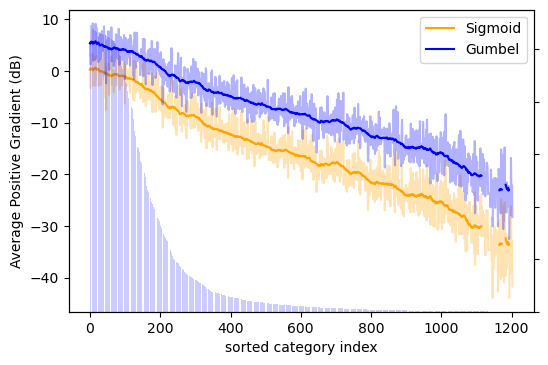

<Figure size 800x500 with 0 Axes>

In [28]:
from matplotlib.pyplot import figure

fig, ax1 = plt.subplots(dpi=100)
figure(figsize=(8,5),dpi=100)
ax1.set_ylabel('Average Positive Gradient (dB)')
ax1.set_xlabel('sorted category index')
epsilon=0
ax2 = ax1.twinx()
lvis_hist=lvis['img_freq'].values[1:][indices]/lvis['img_freq'].values[1:].sum()

ax2.bar(np.arange(1203),lvis_hist,alpha=0.2,color='blue')
ax2.set_yticklabels([])
g_per_grad= g_exp['per_class_grad'].values[indices]+epsilon
s_per_grad= s_exp['per_class_grad'].values[indices]+epsilon

g_per_grad=np.log10(-g_per_grad)*10
nans, x= np.isnan(g_per_grad), lambda z: z.nonzero()[0]
g_per_grad[nans]= np.interp(x(nans), x(~nans), g_per_grad[~nans])

s_per_grad=np.log10(-s_per_grad)*10
nans, x= np.isnan(s_per_grad), lambda z: z.nonzero()[0]
s_per_grad[nans]= np.interp(x(nans), x(~nans), s_per_grad[~nans])

ax1.plot(np.arange(1203),s_per_grad,alpha=0.3,color='orange')
ax1.plot(np.arange(1203),smooth_line(s_per_grad,20),label='Sigmoid',color='orange')
ax1.plot(np.arange(1203),g_per_grad,alpha=0.3,color='blue')
ax1.plot(np.arange(1203),smooth_line(g_per_grad,20),label='Gumbel',color='blue')
ax1.legend()
# fig.savefig('avg_pos_gradient.jpg')


/tmp/ipykernel_3038/968778461.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(1203),np.log10(g_exp['per_class_act'].values[indices]))
/tmp/ipykernel_3038/968778461.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(1203),np.log10(s_exp['per_class_act'].values[indices]))


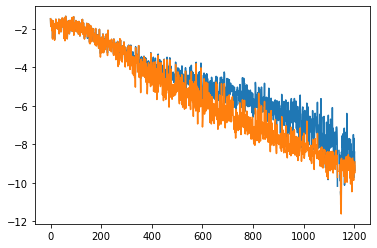

In [34]:
plt.plot(np.arange(1203),np.log10(g_exp['per_class_act'].values[indices]))
plt.plot(np.arange(1203),np.log10(s_exp['per_class_act'].values[indices]))

In [83]:
(s_per_grad==0).sum()

0

In [91]:
nans, x= np.isnan(s_per_grad), lambda z: z.nonzero()[0]
s_per_grad[nans]= np.interp(x(nans), x(~nans), s_per_grad[~nans])

In [98]:
np.isnan(s_per_grad).sum()

0

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import ndtri
import matplotlib

In [41]:
iif={}
space=10000
freqs=np.arange(space)
prob = freqs/space

iif['raw']= -np.log(prob)
iif['smooth'] = np.log((space+1)/(freqs+1))+1
iif['rel'] = np.log((1-prob)/prob)

iif['normit'] = -ndtri(prob)
iif['gombit'] = -np.log(-np.log(1-(prob)))
iif['base2'] = -np.log2(prob)
iif['base10'] = -np.log10(prob)

/tmp/ipykernel_2063886/1957295160.py:6: RuntimeWarning: divide by zero encountered in log
  iif['raw']= -np.log(prob)
/tmp/ipykernel_2063886/1957295160.py:8: RuntimeWarning: divide by zero encountered in true_divide
  iif['rel'] = np.log((1-prob)/prob)
/tmp/ipykernel_2063886/1957295160.py:11: RuntimeWarning: divide by zero encountered in log
  iif['gombit'] = -np.log(-np.log(1-(prob)))
/tmp/ipykernel_2063886/1957295160.py:12: RuntimeWarning: divide by zero encountered in log2
  iif['base2'] = -np.log2(prob)
/tmp/ipykernel_2063886/1957295160.py:13: RuntimeWarning: divide by zero encountered in log10
  iif['base10'] = -np.log10(prob)


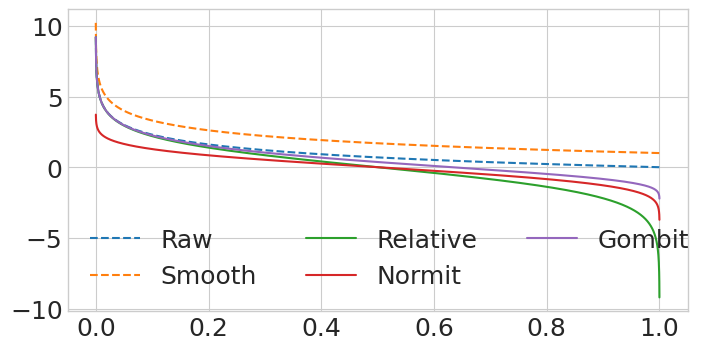

In [72]:
from matplotlib.pyplot import figure
import matplotlib
plt.style.use("seaborn-whitegrid")
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(dpi=100,figsize=(8,4))

ax1.plot(prob,iif['raw'],label='Raw',linestyle='--')
ax1.plot(prob,iif['smooth'],label='Smooth',linestyle='--')
ax1.plot(prob,iif['rel'],label='Relative')

ax1.plot(prob,iif['normit'],label='Normit')
ax1.plot(prob,iif['gombit'],label='Gombit')
# ax1.plot(prob,iif['base2'],label='Base 2',linestyle='--')
# ax1.plot(prob,iif['base10'],label='Base 10',linestyle='--')
ax1.legend(ncol=3)
plt.savefig('iif_curves.png')